# Workbook 6: Supervised Machine Learning

Overview of activities and objectives of this workbook:

1. The first part of this workbook will introduce the K Nearest Neighbour algorithm for supervised learning.
    - We will use the Iris dataset we introduced in the previous week.
    - You are provided code for 1NN (1 nearest neighbour) and will extend this, using generative AI, to KNN (k nearest neighbours).
    - We will also introduce several common Sklearn functions for splitting data into training and test sets, and visualising the results of classifiers.

2. The second part of this workbook will introduce Decision Trees, another supervised learning algorithm.
    - We will use the Sklearn implementation and explore how to limit tree growth (number/depth of branches) to prevent overfitting.

<div style="background:black;width:100%;height:10px"></div>

# Part 1: K nearest neighbours (KNN) 

## Loading the Iris dataset<img src="figures/Iris-image.png" style="float:right;width:150;height:150" alt="An image of an Iris flower with the petals and sepal labelled.">

First we will load the Iris data. This is a classic Machine Learning Data set which contains:
- 4 measurements (features): sepal and petal width and length
- 50 examples from each sub-species for iris flowers (so, 150 total)
- 3 class labels: Iris-Virginica, Iris-Setosa or Iris-Versicolor

The next cell to imports some useful libraries and then loads the iris dataset into two arrays:
- <code>irisX</code> (the features - 150 rows x 4 columns)
- <code>irisy</code> (the class labels - For the purpose of this tutorial we are going to ignore the fact that we are provided with class labels)
- We'll also make a list of the <code>feature_names</code> so we can use them to label our plots.
- Then we'll make a scatter plot to visualise the data.
   - Reusing a useful function from week 5

**Run the cell below to load and visualise the data.**

Iris has 150 samples and 4 features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Iris has 3 classes: ['setosa' 'versicolor' 'virginica']


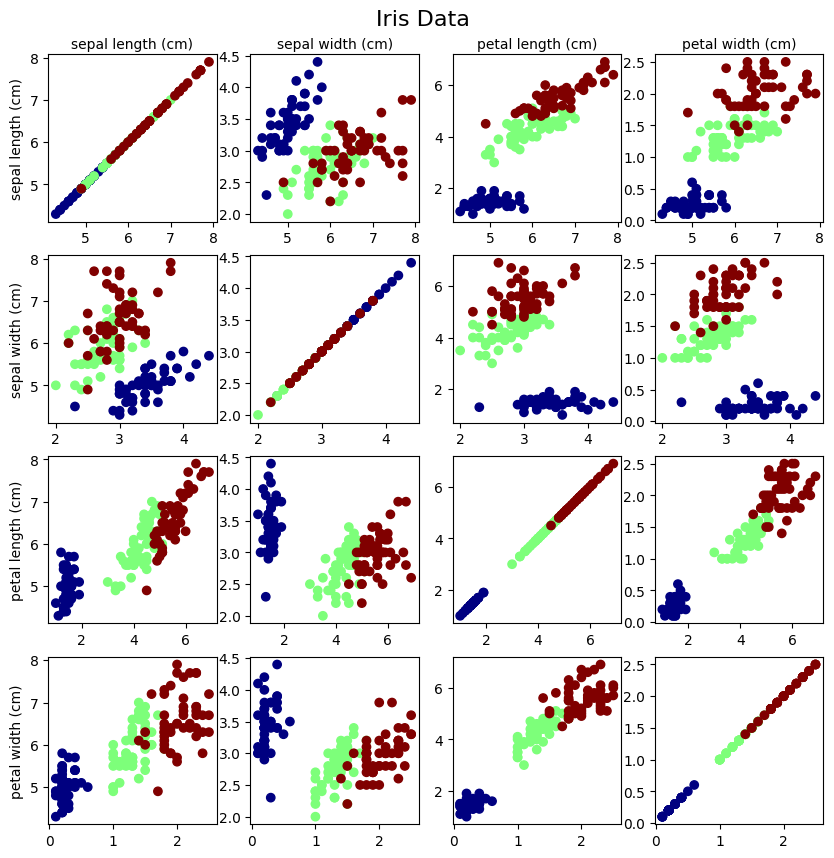

In [1]:
import week6_utils as w6utils
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import numpy as np

# Load the Iris data
iris_data = load_iris(return_X_y=False)
# Extract the data and labels, feature names, and label names
irisX = iris_data.data
irisy = iris_data.target
feature_names = iris_data.feature_names
label_names = iris_data.target_names

print(f"Iris has {irisX.shape[0]} samples and {irisX.shape[1]} features: {feature_names}")
print(f"Iris has 3 classes: {label_names}")

# Create a scatter plot of all the Iris data
w6utils.show_scatterplot_matrix(irisX, irisy, feature_names, "Iris Data")

<div style="background:black;width:100%;height:3px"></div>

## Implementing K-Nearest Neighbours (KNN)

Implementations of supervised ML algorithms typically have two functions `fit()` and `predict()`.

**'Fitting'** -  means building/training the model with the training data, so that it (hopefully) makes good predictions.
   - For  most ML algorithms **`fitting' is a search process**:
      - search space <=> combinations of values for parameters that define a model's behaviour.
      - quality measure <=> accuracy of predictions for training set (and maybe complexity)
  - **For KNN**  fitting just means storing the training data
     - there are sophisticated methods which *search* for the best subset of data to use, but we won't worry about them.

**Predicting** - means using the model to make predictions e.g. the class of a particular data example.

For KNN predicting the label of a new example from the test set:
1. Measure distance to example point from every member of the training set.
2. Find the K Nearest Neighbours.  
   - In other words, the K members of the training set with the smallest distances (*calculated in step 1*)
3. Count the labels of those K training items and return the most common one as the predicted label.

Below is a figure illustrating the start and first two steps of process.  
It is followed by a code cell with a simple implementation of a class for 1-Nearest neighbours i.e. only consider the 1 closest neighbour. 

<b>Read through the code  to get a sense for how it implements the algorithm.</b><br>
Your tutor will discuss it with you in the lab sessions.
<img src="figures/kNN-steps.png">

<div class="alert alert-block alert-warning" style="color:black">
<h3> Calculating straight-line distances in Python</h3>
<p> At school you will have been taught <em>Pythagoras' Theorem<br>
<em>The square of the hypotenuse (long side) of a right-angled triangle is equal to the sum of the square of the other two sides.</em>
</p>
<p>The image above has two dimensions at 90 degrees to each other: <em>x</em> (side to side) and <em>y</em> up and down.<br>
    If we take any two points <em>a</em> and <em>b</em>, we can create a triangle  where:<ul>
<li>the short-sides are the differences between <em>a</em> and <em>b</em> on the <em>x</em> and <em>y</em> dimensions</li>
<li> the long side is the straight line between them (shown as dashed line in the middle image)</li>
<li> Pythagoras' Theorem tells us how to calculate the distnacne between them! </li>
    </ul>
<p>In the general case of <em>n</em> dimensions this is known as the <em>Euclidean Distance</em> and is calculated in  the same way.<br>
    
Dist(a,b) = sqrt ( (a<sub>1</sub> - b<sub>1</sub>)<sup>2</sup>+ (a<sub>2</sub> - b<sub>2</sub>)<sup>2</sup> + ... + (a<sub>n</sub> - b<sub>n</sub>)<sup>2</sup>) 
</p>    

<p> <b>This function is so common in all forms of computing that almost every language has a highly optimised version.</b> <br>
In Python we wil use numpy's <code>np.linalg.norm</code></p>
</div>


<div class="alert alert-block alert-warning" style="color:black">
<h3>Enumerating lists with python</h3>
<p>
Quite often we may want to go through every item in a list and know:
<ul>
    <li> What the item is</li>
    <li> what position it is in (index)</li>
</ul>
We can do this in fewer lines of code by using python's built-in <code>enumerate</code> function.<br>
For example, this code snippet:<br>
<pre><code>my_list = ('a', 'b', 'c')
for idx, name in enumerate(my_list):
    print(idx , name)</code></pre>
produces the output:<br>
0 a<br>
1 b<br>
2 c<br>
</div>

**Run the cell below** to define the class  for 1-Nearest Neighbours

In [2]:
from sklearn.base import ClassifierMixin

class Simple1NNClassifier(ClassifierMixin):
    """ Simple example class for 1-Nearest Neighbours algorithm.
    Assumes numpy is imported as np and uses Euclidean distance
    """    
    def dist_a_b(self, a:np.array, b:np.array)->float:
        """ Euclidean distance between same-size vectors a and b"""
        assert a.shape==b.shape, 'vectors not same size calculating distance'
        return np.linalg.norm(a-b) 
    
    def fit(self, x:np.ndarray, y:np.array):
        """ just stores the data for k-nearest neighbour"""
        self.model_x = x
        self.model_y = y
        self.is_fitted_=True
        self.classes_=np.unique(y)
        
    def predict(self, new_items:np.ndarray):
        """ makes predictions for an array of new items"""

        # Get the number of new  and  stored items from their shapes
        num_new = new_items.shape[0]
        num_stored = self.model_x.shape[0]
        
        # Create empty array to store predictions
        y_pred = np.zeros(num_new, dtype=int)
        
        # Create array of distances: one row(column) for each new(stored) item
        distances = np.zeros((num_new, num_stored))
        for row, new_item in enumerate(new_items):
            for col, stored_example in enumerate(self.model_x):
                distances[row][col]= self.dist_a_b(new_item, stored_example)

        # Make predictions  for each new example in turn
        for item_idx in range(num_new):
            y_pred[item_idx] = self.predict_one(item_idx, distances)
        
        # Return the predictions
        return y_pred
    
    def predict_one(self, item_idx:int, distances:np.ndarray):
        """ makes a class prediction for a single new item
        This version is just for 1 Nearest Neighbour

        Parameters
        ----------
        item_idx: int
            index of item to make prediction for - i.e. idx of row in distances matrix

        distances: numpy ndarray
            array of distances between new items (rows) and training set records (columns)
        """
        # We're going to use numpy's argmin() method - we saw this in week 1
        # - We give it the row corresponding to the item to predict
        # - It returns the index of column with lowest value in that row
        idx_of_nearest_neighbour = np.argmin(distances[item_idx])

        # Return the predicted class of the nearest neighbour
        return self.model_y[ idx_of_nearest_neighbour]

<div style="background:black;width:100%;height:3px"></div><br>

## Applying 1NN to the Iris data

We'll use the simple 1NN (K=1) classifier defined above and train and test on the Iris data we loaded previously.

The next few cells demonstrate how to do this using some of Sklearn functions/classes.

**Steps 1-5 are standard parts of all  supervised Machine Learning workflows**

### Step 1: Split the data into train and test sets
- `test_size` argument specifies how much of the data to keep back for testing (0.33 for the iris data is 50 for testing and 100 for training).
- `stratify` argument makes sure our data has the same proportions of classes in train and test set (1:1:1 for the iris data set as this is *balanced*).

**Run the cell below** to split the data **fairly** into train and test. It will print the size of the training and test sets.

In [3]:
# Make train/test split of datasets
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(irisX, irisy, test_size=0.33, stratify=irisy)

print(f'Training set has {train_x.shape[0]} examples, test set has {test_x.shape[0]} examples')

Training set has 100 examples, test set has 50 examples


### Step 2: Create an instance of the model class then *fit*  it to the training data
**Run the cell below**, it will not produce any output. *Some* ML algorithms with longer training times (e.g. artificial neural networks) may produce `progress indicators'

In [4]:
my_1NN_model = Simple1NNClassifier()
my_1NN_model.fit(train_x, train_y)

### Step 3: Evaluate the trained model's performance on unseen test data
**Run the three cells below** after making sure you understand what they are doing.  
- The first is a reusable function with explicit code that outputs predictions, whether they are the same as the true values, and then creports the proportion correct.  
- The second cell creates a shorter version in a **function that you can re-use.**
- the third then calls this function for your classifier and test data- it should give the same output as the first cell

In [5]:
# Make predictions for test data
predictions = my_1NN_model.predict(test_x)
print(f'Predictions are:\n {predictions}')

# Make array of True/False values for each prediction
# By comparing the predictions to the actual label values
print(f'Prediction matches to actual label values are:\n{test_y==predictions}')

# Calculate the accuracy (as a percentage)
accuracy = 100 * (test_y == predictions).sum() / test_y.shape[0]
print(f"\nOverall Accuracy = {accuracy:.2f} %")

Predictions are:
 [2 0 2 1 1 0 2 0 0 2 1 2 1 1 0 1 1 2 1 0 1 0 1 0 1 2 2 2 1 1 2 2 1 1 0 1 2
 0 2 0 0 1 0 0 1 0 0 2 0 1]
Prediction matches to actual label values are:
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True False  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True False]

Overall Accuracy = 96.00 %


In [6]:
def get_accuracy(classifier,dataset,truelabels)->float:
    """returns the percentage of correct predictions made by a classifier on a dataset"""
    # data and labels must be same size
    assert dataset.shape[0]== truelabels.shape[0], 'dataset and labels are not same size'

    try:
        predictions= classifier.predict(dataset)
        accuracy = 100 * (truelabels == predictions).sum() / truelabels.shape[0]
        return accuracy
    except Exception as e:
        print(f' Had a problem running your code:\n {e}')
        return -1
        

In [7]:
accuracy2 = get_accuracy(my_1NN_model,test_x,test_y)
print(accuracy2)

96.0


### Step 4: Visualise a confusion matrix
A confusion matrix shows the counts of predictions vs the true label for each example. So correct predictions appear on the diagonal.

This is often more useful than just calculating accuracy because **it shows where the classifier is making mistakes**.

The Iris data is quite easy, so most models will make correct predictions for *setosa*  
but misclassify one or two instances of *versicolor* and *virginica*.

**Run the cell below** to create confusion matrix using tools from sklearn.

[]

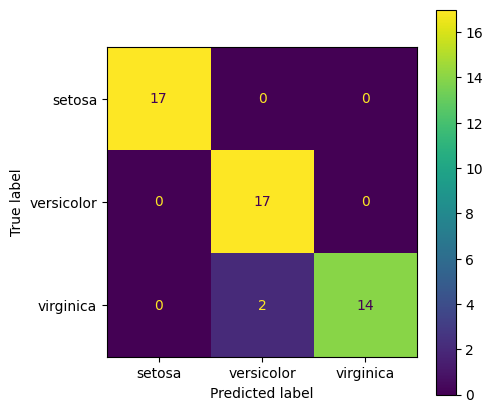

In [8]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay.from_predictions(test_y, predictions, display_labels=label_names)
disp.figure_.set_size_inches(5, 5)
plt.plot()

### Step 5: Visualise the decision boundary

The decision boundary shows how, within the 'decision space' the model is making predictions.

This can be useful to compare how different algorithms make decisions but is hard for most people to recognise in more than 2 dimensions.

So we will quickly train a model using a 2D version of the iris data set (just the petal measurements).


Overall Accuracy in 2D = 72.0%, model makes 14.0 mistakes on test data.


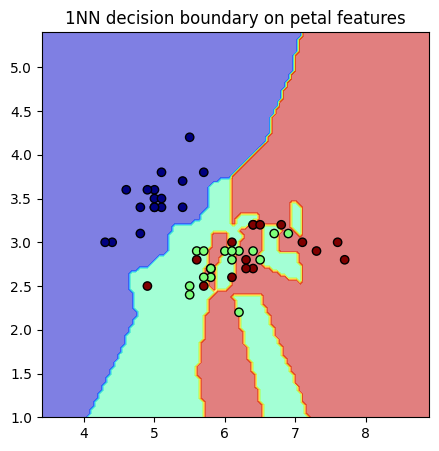

In [9]:
#imports
from sklearn.inspection import DecisionBoundaryDisplay
#from sklearn.neighbors import KNeighborsClassifier

# 1: Make data using numpy slicing to just select the first two columns for every row
petal_trainx = train_x[:, :2]
petal_testx = test_x[:, :2]

# 2: Instantiate and fit model to data
#my_1NN_2d = KNeighborsClassifier(n_neighbors=1)
my_1NN_2d = Simple1NNClassifier()
my_1NN_2d.fit(petal_trainx, train_y)

# 3: Make predictions, score them 
accuracy = get_accuracy(my_1NN_2d,petal_testx,test_y)
num_errors= len(test_y)*(100-accuracy) / 100
print(f"Overall Accuracy in 2D = {accuracy}%, "
      f"model makes {num_errors} mistakes on test data."
      )

# 4: Create the decision boundary learned by model from training data
disp = DecisionBoundaryDisplay.from_estimator(my_1NN_2d, petal_trainx, alpha=0.5)

# # Show where the test is within the decision boundary
disp.ax_.scatter(petal_testx[:, 0], petal_testx[:, 1], c=test_y, edgecolor='black', label='test')
_= disp.ax_.set_title("1NN decision boundary on petal features")
disp.figure_.set_size_inches(5, 5)
plt.show()

<div style="background:black;width:100%;height:5px"></div><br>

<div class="alert alert-block alert-info" style="color:black"><h2>Activity 1: Complete K-nearest neighbours with GenAI</h2>
    <p>The <code>Simple1NNClassifier()</code> class above only implements KNN for K=1, i.e. only considers the single closest neighbour when making predictions. </p>
    <p>In this activity you will extend (via inheritance) the <code>Simple1NNClassifier()</code> into a full KNN classifier. </br>
    In other words, to make a prediction for a new example, it needs to find the most common class amongst the  the K nearest neighbours.</p>
    <p>You need to complete the <code>SimpleKNNClassifier()</code> class below by:</p>
    <ol>
        <li>Over-riding the <code>def __init__()</code> to take one parameter <code>K</code>: the number of neighbours to consider</li>
        <li>Over-riding the <code>predict_one()</code> method so that it:
            <ol>
                <li>Finds the indexes of the <code>self.K</code> nearest neighbours from the <code>distances</code> array.<li>Stores the labels of these neighbours.</li>
                <li>Finds the most common label within the neighbours.</li>
                <li>Returns the most common label as the prediction for the new example.</li>
            </ol>
        </li>
    </ol>
    There are lots of different ways to implement this functionality in Python. For this activity it is suggested you use <b>Generative AI</b> tools to complete the <code>predict_one()</code> method (unless you prefer to code it yourself!). <br><br>
    The next cell below lets you test your KNN implementation with K=1 on the Iris data. You should find it reaches the same accuracy as the <code>Simple1NNClassifier()</code>. Then in the following activity we will think about how to test your implementation to verify it is correct.
</div>

<div class="alert alert-block alert-success" style="color:black"><b>Hints:</b> 
    <ul>
        <li>If you choose to use a GenAI tool with a text/web interface, like ChatGPT or Gemini, you should think carefully about how you construct the prompt. You aren't asking for a full KNN implementation, only a function that makes predictions for 1 new example, so:
            <ul>
                <li>Specify the parameters the function takes.</li>
                <li>What the output should be.</li>
            </ul>
        </li>
        <li>If you choose to use Github Copilot (or similar), you might find it easier to start typing the function definition (<code>def predict_one()</code>) and see if it provides a completion suggestion.
            <ul><li>Or, see if you can get copilot to help you complete each step above individually.</li></ul>
        </li>
    </ul>
</div>

**Write your implementation where indicated in the cell below, then run it.**

In [10]:
class SimpleKNNClassifier(Simple1NNClassifier):
    """Complete this class to produce a KNN classifier"""
    
    def __init__(self,K=1):
        """ Constructor for the KNN classifier
        you will need to change the function signature to expect and store a parameter K
        """
        self.K = K
        self.train_x = None
        self.train_y = None
        #raise NotImplementedError("Complete the function")

    def predict_one(self, item_idx:int, distances:np.ndarray):
        """ makes a class prediction for a single new item
        This version is for K Nearest Neighbour

        Parameters
        ----------
        item_idx: int
            index of item to make prediction for - i.e. idx of row in distances matrix

        distances: numpy ndarray
            array of distances between new items (rows) and training set records (columns)
        """
        # ====> insert your code below here
        nearest_indices = np.argsort(distances[item_idx])[:self.K]

        nearest_labels = self.model_y[nearest_indices]
        
        (values, counts) = np.unique(nearest_labels, return_counts=True)
        most_common_label = values[np.argmax(counts)]
        
        return most_common_label
        #you will need to delete the following line for your code to run
        #raise NotImplementedError("Complete the function")
        
        # <==== insert your code above here



**Run the cell** below to do **one** test of your implementation.  
- All this tests does it see if your code works.
- Because the train / test set are the same, it *should* get the same accuracy as you saw above
when you ran the Simple1NNClassifier.
- But this is just testing that it gets the same *number* of predictions correct, which is quite a crude test!

In [11]:
# Initialize the model with K=1
my_KNN_model = SimpleKNNClassifier(K=1)

# Fit the model to the training data
my_KNN_model.fit(train_x, train_y)

# Make predictions for test data
predictions = my_KNN_model.predict(test_x)
print(f'Predictions are:\n {predictions}')

# Calculate the accuracy
test_accuracy=get_accuracy(my_KNN_model,test_x,test_y)
print(f"\nOverall Accuracy = {test_accuracy} %")

my_1NN_model = Simple1NNClassifier()
my_1NN_model.fit(train_x,train_y)
test_accuracy=get_accuracy(my_1NN_model,test_x,test_y)
print(f'1NN test accuracy {test_accuracy}')

Predictions are:
 [2 0 2 1 1 0 2 0 0 2 1 2 1 1 0 1 1 2 1 0 1 0 1 0 1 2 2 2 1 1 2 2 1 1 0 1 2
 0 2 0 0 1 0 0 1 0 0 2 0 1]

Overall Accuracy = 96.0 %
1NN test accuracy 96.0


<div style="background:black;width:100%;height:5px"></div><br>

<div class="alert alert-block alert-info" style="color:black"><h2>Activity 2: Evaluating KNN and GenAI</h2>
    Generative AI is very powerful and can save us a lot of time by helping to write code. However, you <b>should not blindly trust any code (or any thing) GenAI creates</b>. GenAI doesn't really <i>'understand'</i> what we are asking it to do. It is simply generating text/code/images based on its <i>prediction</i> of what is most likely correct. This does not mean it is correct, and sometimes it will <i>'hallucinate'</i>, i.e. make stuff up!<br>
    So you should always <i>verify</i> anything you ask GenAI to create. For code this should come from your understanding of the code it has generated and the algorithm. But for a more concrete test we can also write some test cases to check the output is correct.<br><br>
    Your <code>SimpleKNNClassifier()</code> with <code>K=1</code> should reach the same accuracy as the previous <code>Simple1NNClassifier()</code> did. <br>But we should check it works for other values of K and also on other data.<br><br>
    Complete the following 3 cells to implement 3 different test cases and evaluate your GenAI version of KNN:
    <ol>
        <li>Compare with the Sklearn implementation of KNN on Iris data. In this case, we know the Sklearn KNN classifier is correct. So we can compare the Sklearn KNN predictions with our own implementation:
            <ul>
                <li>Create an instance of <a href="https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html">Sklearn kNeighboursClassifier</a> and run it on the Iris data to make predictions.</li>
                <li>Create an instance of your <code>SimpleKNNClassifier()</code> and run it on the Iris data to make predictions.</li>
                <li>Compare Sklearn and your classifier predictions accuracy on different values of K.</li>
            </ul>
        </li>
        <li>Compare with the Sklearn implementation of KNN on random data. This is the same as step 1, except instead of Iris data we will randomly generate some.
            <ul>
                <li>Use the <a href="https://scikit-learn.org/1.5/modules/generated/sklearn.datasets.make_classification.html">Sklearn make_classification()</a> function to create a dataset with  500 samples, 2 features and 4 classes. </li>
                <li>Compare Sklearn and your classifier as before.</li>
            </ul>
        </li>
        <li>Construct simple 2D data to test KNN. We can manually construct data that will give different predictions for different values of K, e.g. K=1 predict 0, K=3 predict 1, K=5 predict 0 etc.
            <ul>
                <li>Create two 2D arrays of 5 examples (data points) each. One array for class 0 and one array for class 1.</li>
                <li>Test on a single example. Suggest you use <code>[4.1, 4.1]</code> but you can use another if you prefer!</li>
                <li>Compare Sklearn and your classifier as before. The predictions should be different for increasing values of K, e.g. <code>[1, 0, 1, 0, 1]</code> for k values <code>[1, 3, 5, 7, 9]</code> </li>
            </ul>
        </li>
    </ol>
</div>

<div class="alert alert-block alert-success" style="color:black">
<h3>Hints</h3>
<ul>
<li> You have been given nearly all the code you need</li>
<li>It makes your life much simpler if you re-use the variable names <code>train_x, test_x,train_y,test_y</code>for each dataset (test)</li>
<li>For each test the main loop ( <code>for K in ... </code>) needs to:
<ol>
<li>Create an instance of KNeighborsClassifier with <code>n_neighbors=K</code></li>
<li>Fit the classifier to your training data</li>
<li> Store the classifier's predictions  for the test data in <code>skl_knn_pred</code></li>
<li>call the <code>get_accuracy()</code> function we defined above  and store the results in <code>skl_acc</code></li>
<li> repeat with your SimpleKNNClassifier</code> class but store the predictions and accuracy in <code>my_knn_pred</code> and <code>my_acc</code></li>
    </ol></li>
<li> The link above shows how to make the synthetic data. You need to provide values to over-ride the defaults for <code>n_samples, n_features, n_classes</code></li>
    </ul>
</div>

Test 1: Compare with the Sklearn implementation of KNN on Iris data.  
**Write your implementation where indicated in the cell below** then run it.

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

#Reload and use a fresh split of the iris data
from sklearn.datasets import load_iris
irisX,irisy=load_iris(return_X_y=True)
train_x, test_x, train_y, test_y = train_test_split(irisX, irisy, test_size=0.33, stratify=irisy)


# Test different values of K
for K in [1, 3, 5, 7, 9]:
    # ====> insert your code below here
    skl_knn = KNeighborsClassifier(n_neighbors=K)
    skl_knn.fit(train_x, train_y)
    skl_knn_pred = skl_knn.predict(test_x)
    skl_acc = get_accuracy(skl_knn, test_x, test_y)
    
    my_knn = SimpleKNNClassifier(K=K)
    my_knn.fit(train_x, train_y)
    my_knn_pred = my_knn.predict(test_x)
    my_acc = get_accuracy(my_knn, test_x, test_y)
    # <==== insert your code above here
    print(f"Accuracy of Sklearn model is {skl_acc:.2f}%, your model is {my_acc:.2f}%")
    assert skl_acc == my_acc, f"Accuracy of Sklearn model is not the same as your model for K={K}"

    # Compare individual predictions
    assert (skl_knn_pred == my_knn_pred).all(), "Predictions are not the same for K={K}"
    print(f"Sklearn and your model make the same predictions for K={K}\n")

Accuracy of Sklearn model is 96.00%, your model is 96.00%
Sklearn and your model make the same predictions for K=1

Accuracy of Sklearn model is 96.00%, your model is 96.00%
Sklearn and your model make the same predictions for K=3

Accuracy of Sklearn model is 98.00%, your model is 98.00%
Sklearn and your model make the same predictions for K=5

Accuracy of Sklearn model is 98.00%, your model is 98.00%
Sklearn and your model make the same predictions for K=7

Accuracy of Sklearn model is 98.00%, your model is 98.00%
Sklearn and your model make the same predictions for K=9



Test 2: Compare with the Sklearn implementation of KNN on random data.   
**Write your implementation where indicated in the cell below** then run it.

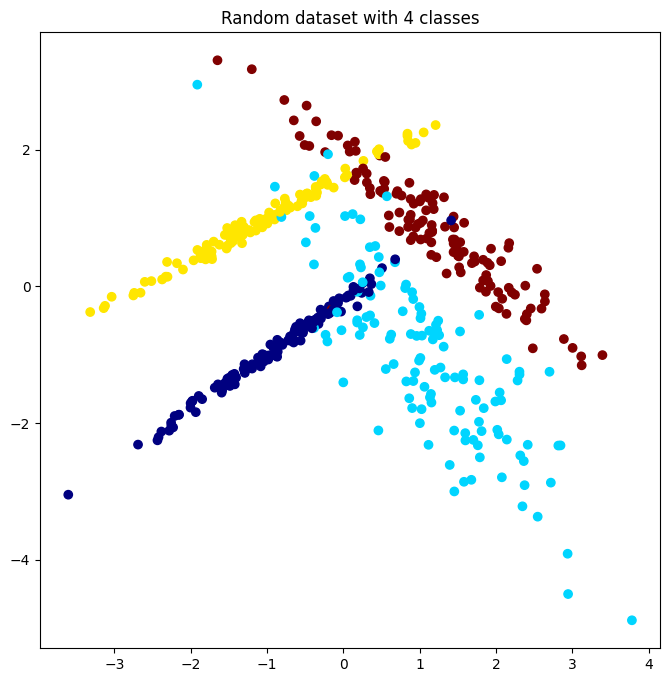

Accuracy of Sklearn model is 95.15%, your model is 95.15%
Sklearn and your model make the same predictions for K=1

Accuracy of Sklearn model is 92.73%, your model is 92.73%
Sklearn and your model make the same predictions for K=3

Accuracy of Sklearn model is 92.73%, your model is 92.73%
Sklearn and your model make the same predictions for K=5

Accuracy of Sklearn model is 92.12%, your model is 92.12%
Sklearn and your model make the same predictions for K=7

Accuracy of Sklearn model is 92.12%, your model is 92.12%
Sklearn and your model make the same predictions for K=9



In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification

# Create a random dataset with 500 samples, 2 features and 4 classes
# ====> insert your code below here
X, y = make_classification(n_samples=500, n_features=2, n_classes=4, 
                          n_informative=2, n_redundant=0, n_repeated=0,
                          n_clusters_per_class=1, random_state=42)
# <==== insert your code above here

# Visualise the data
fig, an = plt.subplots(figsize=(8, 8))
an.scatter(X[:, 0], X[:, 1], c=y)
an.set_title("Random dataset with 4 classes")
plt.show()

# Create a train/test split of the data
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.33, stratify=y)

# Test different values of K
for K in [1, 3, 5, 7, 9]:
    # ====> insert your code below here
    skl_knn = KNeighborsClassifier(n_neighbors=K)
    skl_knn.fit(train_x, train_y)
    skl_knn_pred = skl_knn.predict(test_x)
    skl_acc = get_accuracy(skl_knn, test_x, test_y)

    my_knn = SimpleKNNClassifier(K=K)
    my_knn.fit(train_x, train_y)
    my_knn_pred = my_knn.predict(test_x)
    my_acc = get_accuracy(my_knn, test_x, test_y)
    # <==== insert your code above here
    print(f"Accuracy of Sklearn model is {skl_acc:.2f}%, your model is {my_acc:.2f}%")
    assert skl_acc == my_acc, f"Accuracy of Sklearn model is not the same as your model for K={K}"

    # Compare individual predictions
    assert (skl_knn_pred == my_knn_pred).all(), "Predictions are not the same for K={K}"
    print(f"Sklearn and your model make the same predictions for K={K}\n")

Test 3: Construct simple 2D data to test KNN

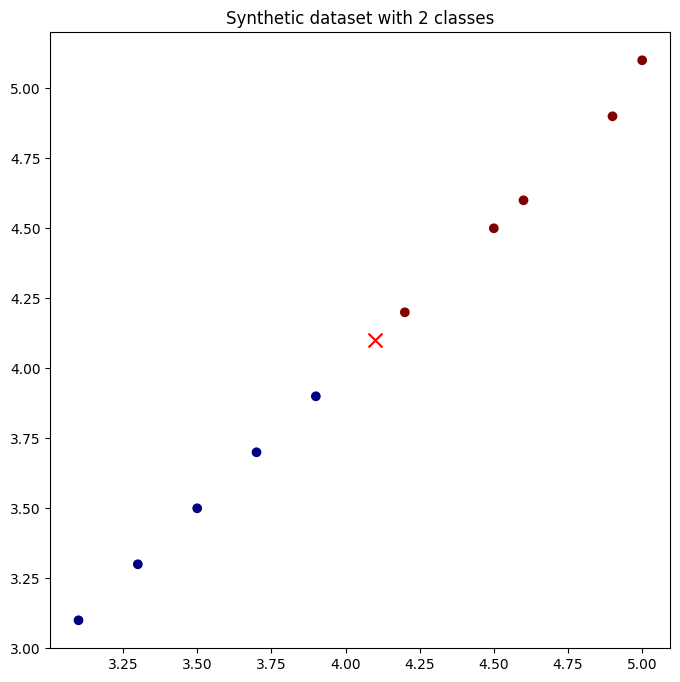

Sklearn and your model make the same predictions 1 and 1 for K=1

Sklearn and your model make the same predictions 0 and 0 for K=3

Sklearn and your model make the same predictions 1 and 1 for K=5

Sklearn and your model make the same predictions 0 and 0 for K=7

Sklearn and your model make the same predictions 1 and 1 for K=9

All predictions are as expected [1, 0, 1, 0, 1] for different values of K


C:\Users\gshri\AppData\Roaming\Python\Python313\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\gshri\AppData\Roaming\Python\Python313\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\Program Files\Python313\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Program Files\Python313\Lib\subprocess.py", line 1036, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,

In [14]:
from sklearn.neighbors import KNeighborsClassifier

# Generate synthetic 2D data with 5 examples in each class
class_0 = np.array([[3.9, 3.9], [3.7, 3.7], [3.5, 3.5], [3.3, 3.3], [3.1, 3.1]])
class_1 = np.array([[4.2, 4.2], [4.5, 4.5], [4.6, 4.6], [4.9, 4.9], [5.0, 5.1]])  

# Combine data and labels
X = np.vstack((class_0, class_1))
y = np.array([0] * len(class_0) + [1] * len(class_1))  # Convert to numpy array

# Test point (should be a 2D array)
test_x = np.array([[4.1, 4.1]])  # Note the double brackets to make it 2D

# Visualise the data
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(X[:, 0], X[:, 1], c=y)
ax.scatter(test_x[:, 0], test_x[:, 1], c='red', marker='x', s=100)
ax.set_title("Synthetic dataset with 2 classes")
plt.show()

# Test different values of K
predictions = []
for K in [1, 3, 5, 7, 9]:
    # Sklearn KNN
    skl_knn = KNeighborsClassifier(n_neighbors=K)
    skl_knn.fit(X, y)
    skl_knn_pred = skl_knn.predict(test_x)
    
    # Our KNN
    my_knn = SimpleKNNClassifier(K=K)
    my_knn.fit(X, y)
    my_knn_pred = my_knn.predict(test_x)  # Pass test_x, not test_y
    
    assert skl_knn_pred == my_knn_pred, f"Prediction is not the same for K={K}"
    predictions.append(my_knn_pred[0].item())
    print(f"Sklearn and your model make the same predictions {my_knn_pred[0]} and {skl_knn_pred[0]} for K={K}\n")

# Check the predictions were different for different values of K
assert predictions == [1, 0, 1, 0, 1], "Predictions are not as expected"
print(f"All predictions are as expected {predictions} for different values of K")

<div style="background:black;width:100%;height:5px"></div><br>

<div class="alert alert-block alert-info" style="color:black"><h2>Activity 3: Experiment with KNN</h2>
Now that you have established that your implementation of KNN is correct, lets explore a few things that might effect its output predictions.

Creating different splits of the Iris data using  Sklearn's <code>train_test_split()</code> function:
    <ul>
        <li>Try changing the <code>random_state</code> parameter.</li>
        <li>Try removing the <code>stratify</code> parameter.</li>
        <li>Try changing the <code>test_size</code> parameter.</li>
        <li>Does it reach the same accuracy/predictions as before?</li>
        <li>If these are not the same, can you explain why not?</li>
    </ul>

In Machine Learning we talk about algorithms having <b>hyper-parameters</b> that control their behaviour. For KNN <code>K</code> is a <i>hyperparamter</i>. Try running and evaluating KNN with K = {3, 5, 7, 9}:
    <ul>
        <li>Make <b>qualitative</b> judgements: how does the decision surface change? (you might need to select 2 features as before).</li>
        <li>Make <b>quantitative</b> judgements:  how does the confusion matrix change?</li>
        <li>What value for the hyper-parameter <b>K</b> gives the best accuracy on the <b>train</b> set?</li>
        <li>What value for the hyper-parameter <b>K</b> gives the best accuracy on the <b>test</b> set?</li>
        <li>If these are not the same, can you explain why not?</li>
    </ul>
</div>

Training set has 100 examples, test set has 50 examples
Overall Accuracy for K=3 is 96.00%


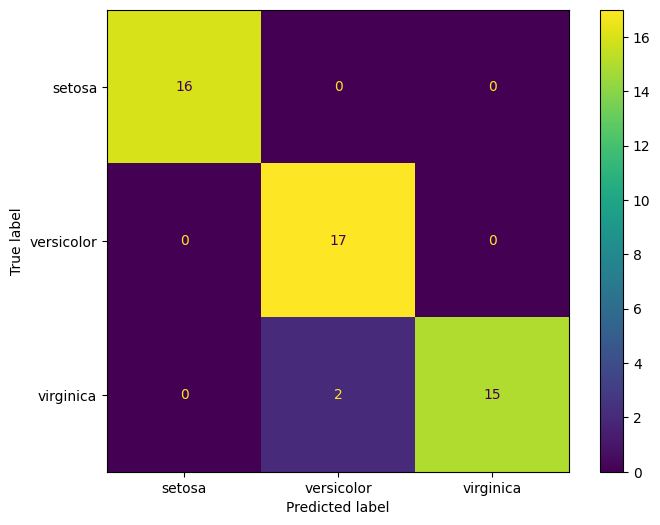

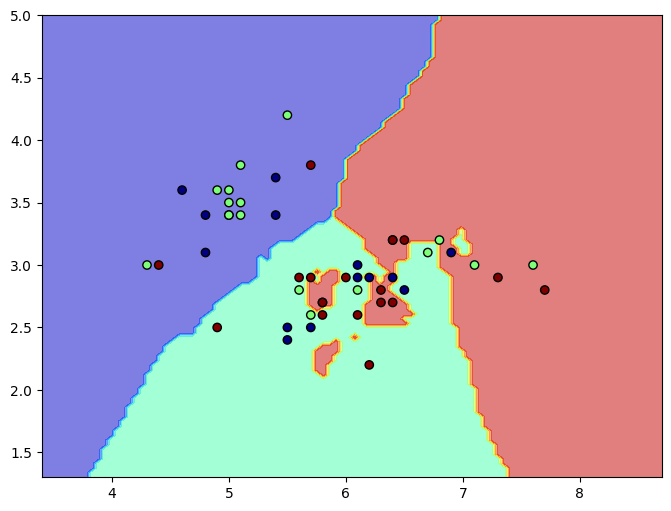

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Make train/test split of datasets
train_x, test_x, train_y, test_y = train_test_split(irisX, irisy, test_size=0.33, stratify=irisy, random_state=42)
print(f'Training set has {train_x.shape[0]} examples, test set has {test_x.shape[0]} examples')

# Set K
K = 3

# Instantiate and fit model to data
knn = SimpleKNNClassifier(K=K)
knn.fit(train_x, train_y)

# Make predictions
predictions = knn.predict(test_x)

# Calculate the accuracy
accuracy = 100 * (test_y == predictions).sum() / test_y.shape[0]
print(f"Overall Accuracy for K={K} is {accuracy:.2f}%")

# Plot the confusion matrix
disp = ConfusionMatrixDisplay.from_predictions(test_y, predictions, display_labels=label_names)
disp.figure_.set_size_inches(8, 6)
plt.plot()

# Create the decision boundary learned by model from training data
trainx_2_features = train_x[:, :2]
testx_2_features = test_x[:, :2]
knn_2d = KNeighborsClassifier(n_neighbors=K).fit(trainx_2_features, train_y)
disp = DecisionBoundaryDisplay.from_estimator(knn_2d, testx_2_features, alpha=0.5)
disp.ax_.scatter(petal_testx[:, 0], petal_testx[:, 1], c=test_y, edgecolor='black', label='test')
disp.figure_.set_size_inches(8, 6)
plt.show()


<div style="background:black;width:100%;height:10px"></div><br>

# Part 2: Decision Trees

In the lecture notebook we illustrated how the decision tree is created by dividing input space using a set of axis-parallel lines.

The tree is 'grown' by:
1. Start with single node that predicts majority class label.
2. Loop over every leaf node:
    - Measure (in some way) the "information content" of the data that arrives at that node.
    - For each possible data split:
        - measure and add the "information content" of the child nodes created by the split
        - subtract information content of parent
        - result is the *gain* in information content given by split
        - update stored "best split" if appropriate
    - If the  "best" split is above some threshold then change the leaf node to an interior node with the *best* condition.
    - If <i>termination criteria</i> not met goto step 2.

The following cells demonstrate how to create, train and evaluate a Decision Tree using Sklearn.

### Step 1: Split the data into train and test sets

In [16]:
# Make train/test split of datasets
train_x, test_x, train_y, test_y = train_test_split(irisX, irisy, test_size=0.33, stratify=irisy)
print(f'Training set has {train_x.shape[0]} examples, test set has {test_x.shape[0]} examples')

Training set has 100 examples, test set has 50 examples


### Step 2: Create an instance of the model class then *fit*  it to the training data

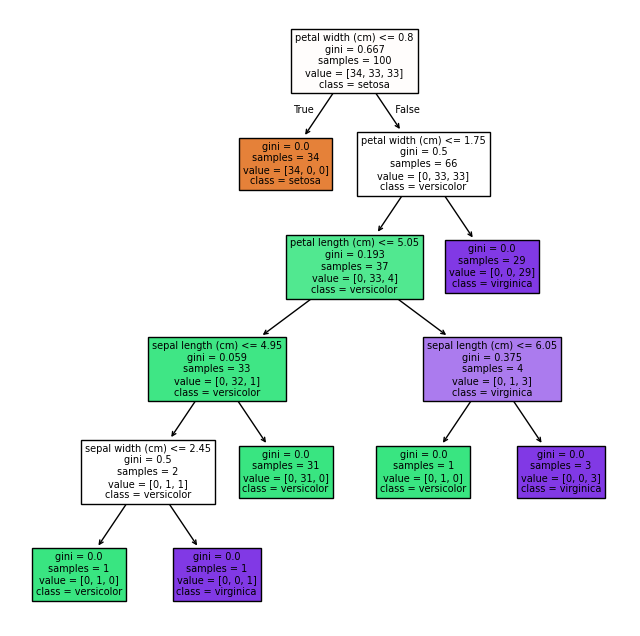

In [17]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree

# Instantiate and fit model to data
my_dt = DecisionTreeClassifier()
my_dt.fit(train_x, train_y)

# Show the decision tree
fig, ax = plt.subplots(figsize=(8, 8))
tree.plot_tree(my_dt, feature_names=feature_names, class_names=label_names, filled=True, ax=ax)
plt.show()

### Step 3: Evaluate the trained model's performance on unseen test data

In [18]:
# Make predictions for test data
predictions = my_dt.predict(test_x)
print(f'Predictions are:\n {predictions}')

# Calculate the accuracy
accuracy = 100 * (test_y == predictions).sum() / test_y.shape[0]
print(f"\nOverall Accuracy = {accuracy:.2f} %")

Predictions are:
 [0 0 2 0 2 1 1 0 1 2 0 2 2 1 0 0 0 0 2 2 1 0 2 1 0 0 2 1 2 1 0 1 2 2 1 0 2
 0 1 1 0 1 2 2 2 1 1 1 2 1]

Overall Accuracy = 96.00 %


### Step 4: Visualise a confusion matrix

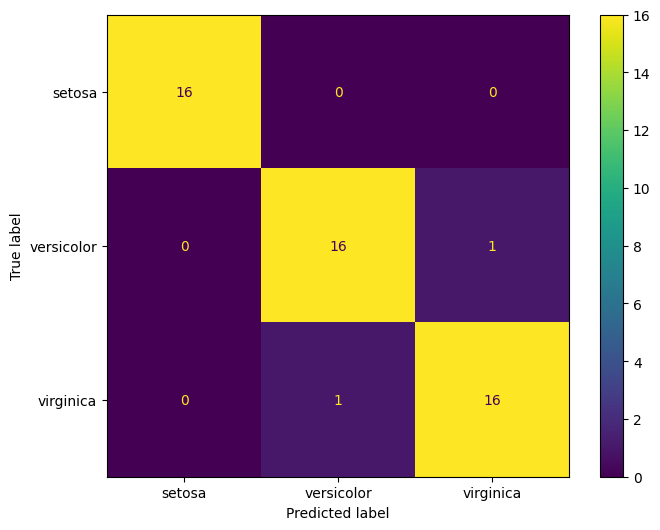

In [19]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay.from_predictions(test_y, predictions, display_labels=label_names)
disp.figure_.set_size_inches(8, 6)
plt.plot()
plt.show()

### Step 5: Visualise the decision boundary

Overall Accuracy in 2D = 76.0%, model makes 12 mistakes


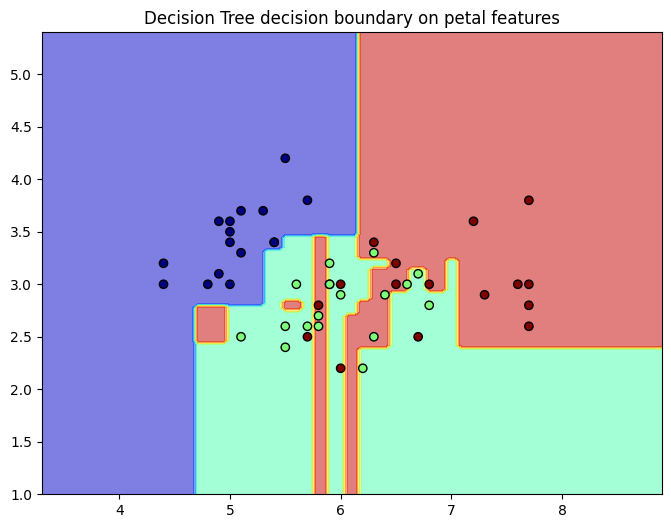

In [20]:
from sklearn.inspection import DecisionBoundaryDisplay

# Make data using numpy slicing to just pull the last two columns for every row
petal_trainx = train_x[:, :2]
petal_testx = test_x[:, :2]

# Instantiate and fit model to data
my_dt_2d = DecisionTreeClassifier()
my_dt_2d.fit(petal_trainx, train_y)

# Make predictions, score them 
y_pred = my_dt_2d.predict(petal_testx)
accuracy = 100 * ( test_y == y_pred).sum() / test_y.shape[0]
num_errors= len(y_pred) - (test_y == y_pred).sum()
print(f"Overall Accuracy in 2D = {accuracy}%, model makes {num_errors} mistakes")

# Create the decision boundary learned by model from training data
disp = DecisionBoundaryDisplay.from_estimator(my_dt_2d, petal_trainx, alpha=0.5)

# # Show where the test is within the decision boundary
disp.ax_.scatter(petal_testx[:, 0], petal_testx[:, 1], c=test_y, edgecolor='black', label='test')
_= disp.ax_.set_title("Decision Tree decision boundary on petal features")
disp.figure_.set_size_inches(8, 6)
plt.show()

<div style="background:black;width:100%;height:5px"></div><br>

<div class="alert alert-block alert-info" style="color:black"><h2>Activity 4: Experiment with Decision Trees</h2>
We often want to control how we learn a model (in this case, grow a tree) to avoid a phenomenon call <i>over-fitting</i>. This is where the model is capturing fine-details of the training set and so failing to generalise from the training set to the real world.

The aim of this activity is for you to experiment with what happens when you change two <b>hyper-parameters</b> that affect how big and complex the tree is allowed to get.
<ul>
    <li><code>max_depth</code>: default is None</li>
    <li><code>min_samples_leaf</code>: default value is 1</li>
</ul>
Experiment with the Iris data set we loaded earlier to see if you can work out what each of these hyper-parameters does, and how it affects the tree. Try running and evaluating Decision Trees with different values for <code>max_depth</code> = {None, 1, 3, 5} and <code>min_samples_leaf</code> = {1, 3, 5}:
    <ul>
        <li>Do some combinations result in bigger differences between accuracy on the train / test sets?</li>
        <li>Is there a combination of hyper-parameter values that means you consistently get similar trees?</li>
        <li>What is a good way of judging 'similarity?</li>
        <li>Do different train/test splits affect what tree you get?</li>
    </ul>
</div>

Training set has 100 examples, test set has 50 examples
Overall Accuracy for depth=None and min_leaf=3 is 88.00%


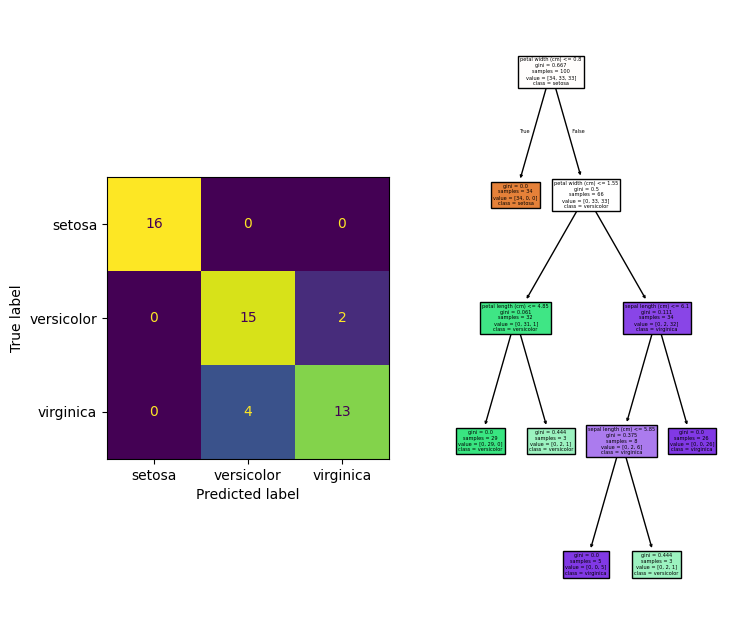

In [21]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
from sklearn.model_selection import train_test_split

# Make train/test split of datasets
train_x, test_x, train_y, test_y = train_test_split(irisX, irisy, test_size=0.33, stratify=irisy, random_state=42)
print(f'Training set has {train_x.shape[0]} examples, test set has {test_x.shape[0]} examples')

# Experiment with changing these values
depth = None  # Try None 1, 3, 5
min_leaf = 3  # Try 1, 3, 5

# Instantiate and fit model to data
my_dt = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=min_leaf)
my_dt.fit(train_x, train_y)

# Make predictions
predictions = my_dt.predict(test_x)

# Calculate the accuracy
accuracy = 100 * (test_y == predictions).sum() / test_y.shape[0]
print(f"Overall Accuracy for depth={depth} and min_leaf={min_leaf} is {accuracy:.2f}%")


# Plot the confusion matrix and the tree side by side
fig, ax= plt.subplots(ncols=2, figsize=(8, 8)) 
cm = ConfusionMatrixDisplay.from_predictions(test_y, predictions, display_labels=label_names, colorbar=False, ax=ax[0])
_ = tree.plot_tree(my_dt, feature_names=feature_names, class_names=label_names, filled=True, ax=ax[1])


<div class="alert alert-block alert-success" style="color:black"><b>Save and close Jupyter:</b>
    <ol>
        <li>Use the jupyterlab functions to download your work (ask your tutor if you need help with this) and save it somewhere sensible so you can find it easily.</li>
        <li>Shutdown the notebook when you have finished with this tutorial (menu->file->close and shutdown notebook)</li>
    </ol>
</div